In [1]:
# MNIST dataset download from kaggle
# https://www.kaggle.com/c/digit-recognizer/data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0 = pd.read_csv('./digit_train.csv')
print(d0.head(5))

#save label into variable l
l = d0['label']

#drop the label feature from dataframe
d=d0.drop('label',axis=1)

#checking label is removed or not
print(d.head())



   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [2]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


Label = 9


C:\Users\HARSH\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


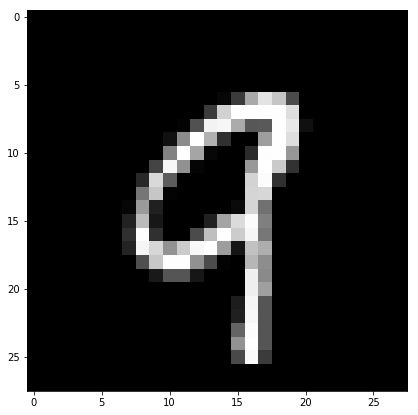

In [3]:
#display a number using that pixel
plt.figure(figsize=(7,7))
index = 41999

#getting data from index (=100) by using iloc[index]
#converting that data or row into matrix of size 28x28
grid_data = d.iloc[index].as_matrix().reshape(28,28)

#imshow() show images and cmap = colour-map
plt.imshow(grid_data , interpolation = "none" , cmap = "gray")

print("Label =",l[index])
plt.show()

# 2D Visualization using PCA

In [4]:
#Data Preprocessing : Standardizing Data ie mean = 0 and std-dev = 1 and all point located arround center(0,0)
# StandardScaler performs standardization
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(d)
print(standardized_data.shape)

C:\Users\HARSH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(42000, 784)


C:\Users\HARSH\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [5]:
#find Covariance matrix which is X^T * X
sample_data = standardized_data
label = l

#matrix multiplication using numpy 
covar_matrix = np.matmul(sample_data.T , sample_data)

print("Shape Of Covariance Matrix =",covar_matrix.shape)

Shape Of Covariance Matrix = (784, 784)


In [6]:
#FInding Top 2 (or 2 maximal) eigen-values and corresponding eigen-vector
#to project on 2D space

from scipy.linalg import eigh

# eigh() will return eigen-values in asending order
# the parameter 'eigvals' is defind (low value to hight value)
# this number 782,783 will give 2 maximal values ie it computes only top 2 values
values,vectors = eigh(covar_matrix , eigvals=(782,783))

print("shape of eigen vectors",vectors.shape)
# conbverting into (2,d) for easyness of calculation
vectors = vectors.T

#here vectors[1] represents eigen-vector corresponding to 1st PCA
#here vectors[0] represents eigen-vector corresponding to 2st PCA
print("shape of eigen vectors",vectors.shape)


shape of eigen vectors (784, 2)
shape of eigen vectors (2, 784)


In [7]:
#projecting the original data sample formed by 2 Principle eigen-vectors by vector-vector mul.
new_coordinates = np.matmul(vectors,sample_data.T)
print("The shape of new data points ",vectors.shape,"X",sample_data.T.shape,"=" ,new_coordinates.shape)
print("SHape of label",label.shape)

The shape of new data points  (2, 784) X (784, 42000) = (2, 42000)
SHape of label (42000,)


In [8]:
#appending lable to 2nd projected data vstack() append values vertically
new_coordinates = np.vstack((new_coordinates,label)).T

#creating a new data frame for plotting the labelled points
dataframe = pd.DataFrame(data=new_coordinates , columns=("1st_principal","2nd_principal","label"))
print(dataframe.head())
print(new_coordinates.shape)

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0
(42000, 3)


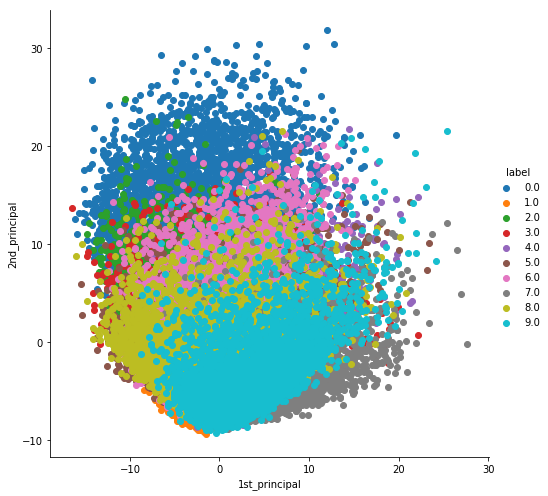

In [9]:
#plotting data
import seaborn as sb
sb.FacetGrid(dataframe,hue="label",height=7).map(plt.scatter, '1st_principal','2nd_principal').add_legend()
plt.show()

# PCA Using Scikit-Learn
No need to calculate above eigen-values and eigen-vectors

In [10]:
#initializing the PCA
from sklearn import decomposition
pca = decomposition.PCA()

In [11]:
#configuring the parameter 
#the number of components = 2
pca.n_components = 2

#it also standarized the sample data
pca_data = pca.fit_transform(sample_data)
 
# pca_reduced will contain the 2D project of simple data
print("Shape of pca_reduced.shape",pca_data.shape)

Shape of pca_reduced.shape (42000, 2)


In [12]:
#appending lable to 2nd projected data vstack() append values vertically
pca_data = np.vstack((pca_data.T,label)).T

#creating a new data frame for plotting the labelled points
dataframe = pd.DataFrame(data=pca_data , columns=("1st_principal","2nd_principal","label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.140468      -5.226645    1.0
1      19.292298       6.032394    0.0
2      -7.644497      -1.705894    1.0
3      -0.474247       5.835703    4.0
4      26.559568       6.024414    0.0


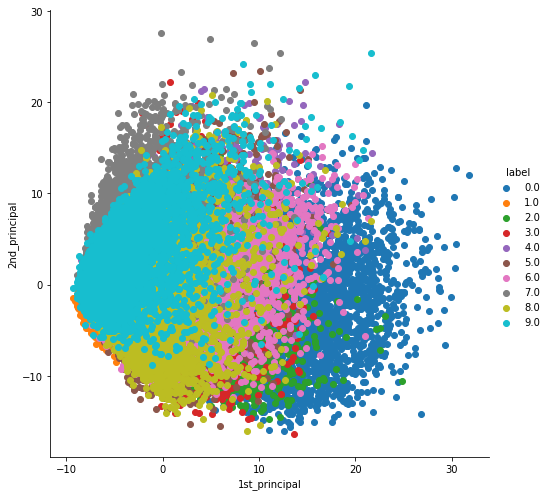

In [13]:
sb.FacetGrid(dataframe,hue="label",height=7).map(plt.scatter, '1st_principal','2nd_principal').add_legend()
plt.show()

# PCA for dimention reduction (not for Visualization)

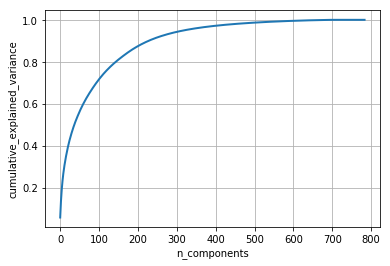

In [14]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)

#computive cumulative sum of eigen values(when divied by their sum ie. percentage)
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1,figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel("n_components")
plt.ylabel("cumulative_explained_variance")
plt.show()

#to get 90 percentage of info we use this plot here it is 200 Dimention

# t-SNE using Scikit-Learn

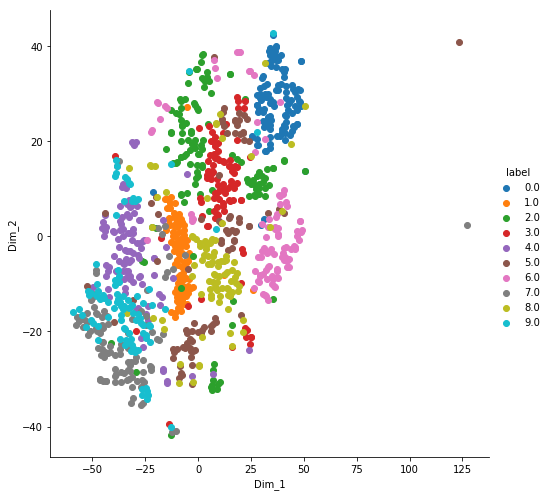

In [17]:
from sklearn.manifold import TSNE

# picking the top 1000 points as TSNE takes a lot of time for 42K points

data_1000 = standardized_data[:1000:]
label_1000 = label[:1000:]

# configuring the parameters
# the number of components = 2 
# default perplexity = 30
# default learning rate (epsilon) = 200
# default Maximum number of steps or iteration = 1000
# random_state is the no. which define that algo generate same results on multiple run bcs t-SNE is randomize algo
model = TSNE(n_components=2, random_state = 0)

# generate the t-SNE data from above model used from sklearn and by passing data
tsne_data = model.fit_transform(data_1000)

# creating a new data frame which has 3 column including label
tsne_data = np.vstack((tsne_data.T,label_1000)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))

# plotting the result of tsne
sb.FacetGrid(tsne_df,hue="label",height=7).map(plt.scatter,"Dim_1","Dim_2").add_legend()
plt.show()

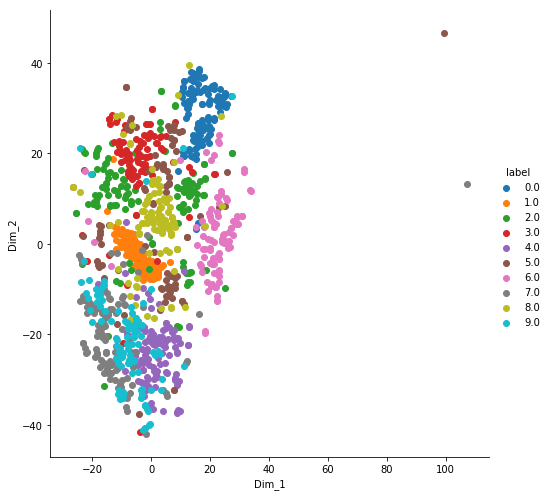

In [18]:
# Changing the perplexity
model = TSNE(n_components=2, random_state = 0,perplexity=50)

# generate the t-SNE data from above model used from sklearn and by passing data
tsne_data = model.fit_transform(data_1000)

# creating a new data frame which has 3 column including label
tsne_data = np.vstack((tsne_data.T,label_1000)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))

# plotting the result of tsne
sb.FacetGrid(tsne_df,hue="label",height=7).map(plt.scatter,"Dim_1","Dim_2").add_legend()
plt.show()

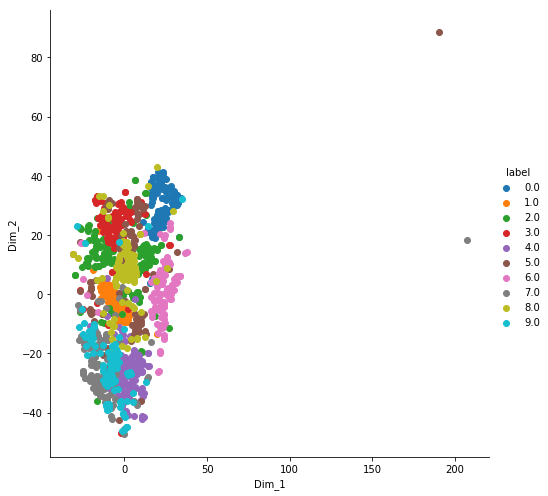

In [23]:
# Changing the NUMBER OF STEPS or Iteration
model = TSNE(n_components=2, random_state = 0,perplexity=50,n_iter=5000)

# generate the t-SNE data from above model used from sklearn and by passing data
tsne_data = model.fit_transform(data_1000)

# creating a new data frame which has 3 column including label
tsne_data = np.vstack((tsne_data.T,label_1000)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))

# plotting the result of tsne
sb.FacetGrid(tsne_df,hue="label",height=7).map(plt.scatter,"Dim_1","Dim_2").add_legend()
plt.show()


# For 15K Points

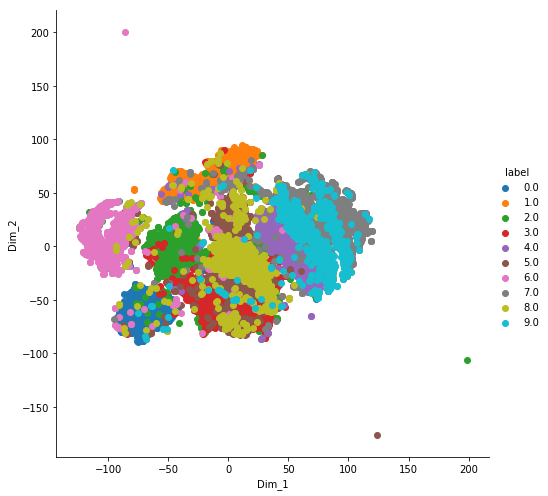

In [22]:
# 35 min to run this on i5
data_15000 = standardized_data[:15000:]
label_15000 = label[:15000:]

model = TSNE(n_components=2, random_state = 0,perplexity=50,n_iter=5000)

# generate the t-SNE data from above model used from sklearn and by passing data
tsne_data = model.fit_transform(data_15000)

# creating a new data frame which has 3 column including label
tsne_data = np.vstack((tsne_data.T,label_15000)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))

# plotting the result of tsne
sb.FacetGrid(tsne_df,hue="label",height=7).map(plt.scatter,"Dim_1","Dim_2").add_legend()
plt.show()